# Regression with CART Trees - Lab

## Introduction

In this lab, we'll make use of what we learned in the previous lesson to build a model for the ["Petrol Consumption Dataset"](https://www.kaggle.com/harinir/petrol-consumption) from Kaggle. This model will be used to predict gasoline consumption for a bunch of examples, based on drivers' features.

## Objectives
You will be able to:
- Conduct a regression experiment using CART trees
- Evaluate the model fit and study the impact of hyper parameters on the final tree
- Understand training, prediction, evaluation and visualizations required to run regression experiments using trees

## Import necessary libraries 

In [1]:
# Import libraries 
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

## Read the dataset `petrol_consumption.csv` and view its head and dimensions

In [3]:
# Read the dataset and view head and dimensions
df = pd.read_csv('petrol_consumption.csv')
df.head()
# Code here

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


## Check the basic statistics for the dataset and inspect the target variable `Petrol_Consumption`

In [4]:
# Describe the dataset
df.describe()
# Code here

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


## Create features, labels and train/test datasets with a 80/20 split

As with the classification task, we will divide our data into attributes/features and labels and consequently into training and test sets.

In [8]:
from sklearn.model_selection import train_test_split

# Create datasets for training and test
X = df[['Petrol_tax','Average_income','Paved_Highways','Population_Driver_licence(%)']]
y = df.Petrol_Consumption

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# Code here

## Create an instance of CART regressor and fit the data to the model 

As mentioned earlier, for a regression task we'll use a different `sklearn` class than we did for the classification task. The class we'll be using here is the `DecisionTreeRegressor` class, as opposed to the `DecisionTreeClassifier` from before.

In [28]:
# Train a regression tree model with training data 
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=3)
dtr.fit(X_train, y_train)

# Code here

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

 ## Using test set, make predictions and calculate the MAE, MSE and RMSE
 
Just as with Decision Trees for classification, there are several commonly used metrics for evaluating the performance of our model. The most common metrics are:

* Mean Absolute Error (MAE)
* Mean Squared Error (MSE)
* Root Mean Squared Error (RMSE)

If these look familiar, its likely because you have already seen them before--they are common evaluation metrics for any sort of regression model, and as we can see, Regressions performed with Decision Tree models are no exception!
 
Since these are common evaluation metrics, sklearn has functions for each of them that we can use to make our job easier. You'll find these functions inside the `metrics` module. In the cell below, calculate each of the three evaluation metrics listed above!

In [29]:
# Predict and evaluate the predictions
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = dtr.predict(X_test)


print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))

# Code here

Mean Absolute Error:  63.945054945054935
Mean Squared Error:  7736.205850668121
Root Mean Squared Error:  87.95570391207224


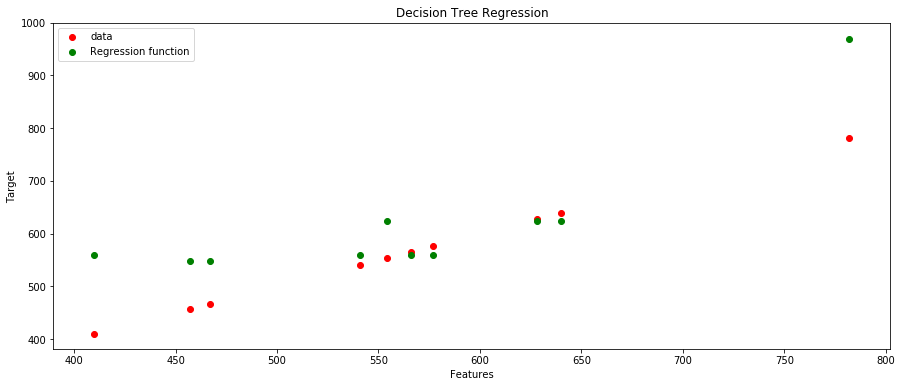

In [30]:
plt.figure(figsize=(15,6))
plt.scatter(y_test, y_test, color = 'red', label='data')
plt.scatter(y_test, y_pred, color = 'green', label='Regression function')
plt.title('Decision Tree Regression')
plt.xlabel('Features')
plt.ylabel('Target')
plt.legend()
plt.show()

## Level Up - Optional 

- In order to understand and interpret a tree structure, we need some domain knowledge in which the data was generated. That can help us inspect each leaf and investigate/prune the tree based on qualitative analysis. 

- Look at the hyper parameters used in the regression tree, check their values ranges in official doc and try running some optimization by growing a number of trees in a loop. 

- Use a dataset that you are familiar with and run tree regression to see if you can interpret the results.

- Check for outliers, try normalization and see the impact on the output 

## Summary 

In this lesson, we developed a tree regressor architecture to train the regressor and predict values for unseen data. We saw that with a vanilla approach, the results were not so great, and this requires further pre-tuning of the model (what we described as hyper parameter optimization OR pruning in the case of trees. 